## Data Visualization Practice
### Univariate Exploration of Data
#### Bar Chart Practice
Seaborn countplot function to generate this chart

In [33]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# data set up
pokemon = pd.read_csv(r'C:\Users\trtu2001\Downloads\Udacity - Python Practice\pokemon.csv')

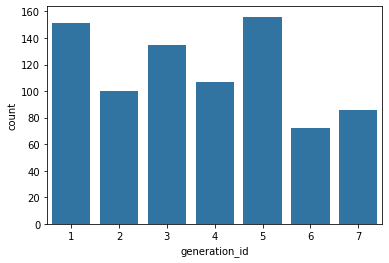

In [17]:
# sb.color_palette is a method of seaborn that provide a list of 10 colors
# each color is presented by a list of 3 elements 
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

Horizontal bar chart representing Pokemon types. The unique() method was used to get the number of different Pokemon species.

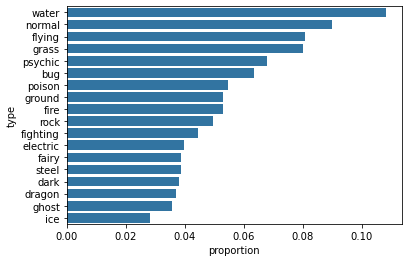

In [44]:
# use melt - a pandas method to unpivot columns.
# id vars are columns without unpivoting
# value_vars are columns with pivotting
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
value_vars = ['type_1','type_2'], var_name = 'type_level', 
value_name = 'type').dropna()
# get order of bars by frequency 
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index
pkmn_types
base_color=sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', 
color=base_color, order=type_order);
tick_props = np.arange(0, type_counts.max()/type_counts.sum(),0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props];
plt.xticks(tick_props*type_counts.sum(), tick_names);
plt.xlabel('proportion');


#### Histogram Practice


In [49]:
pokemon.columns

Index(['id', 'species', 'generation_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'hp', 'attack', 'defense', 'speed',
       'special-attack', 'special-defense'],
      dtype='object')

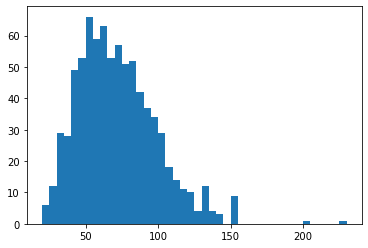

In [50]:
bins = np.arange(20, pokemon['special-defense'].max()+5, 5)
plt.hist(pokemon['special-defense'], bins=bins);


- Use figure and add_axes

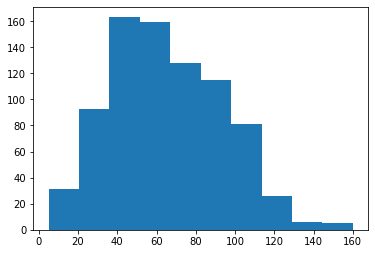

In [68]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.5, .5, .775, .775])
ax.hist(data=pokemon, x='speed');



- Use subplots

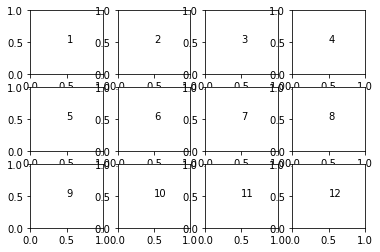

In [67]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

(0.0, 6.0)

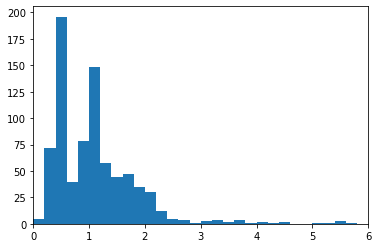

In [69]:
# data setup
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins)
plt.xlim((0,6))

Text(0.5, 0, 'Weight (kg)')

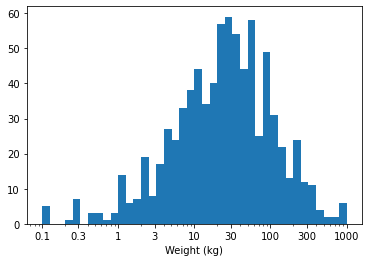

In [70]:
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Weight (kg)')

### Bivariate Exploration of Data
#### Scatterplot and Correlation 
  

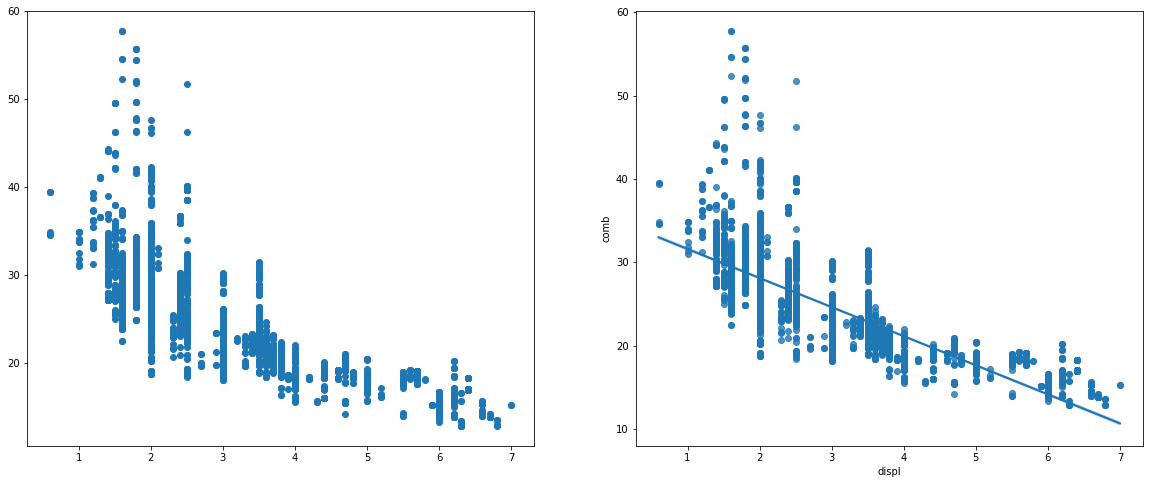

In [87]:
# Create fig and add subplot
fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
# Read the CSV file
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head(10)

# Scatter plot
ax1.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');

# Regplot
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg=True, ax=ax2);

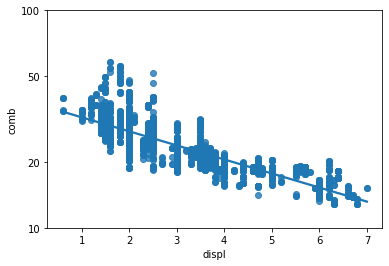

In [99]:
def log_trans(x, inverse = False):
    if not inverse:        
        return np.log10(x)
    else:
        return np.power(10, x)



sb.regplot(x=fuel_econ['displ'], y=fuel_econ['comb'].apply(log_trans));
tick_locs = [10, 20, 50, 100];
plt.yticks(log_trans(tick_locs), tick_locs);

#### Overplotting, Transparency and Jitter 
- Jitter - Randomly add/subtract a small value to each data point

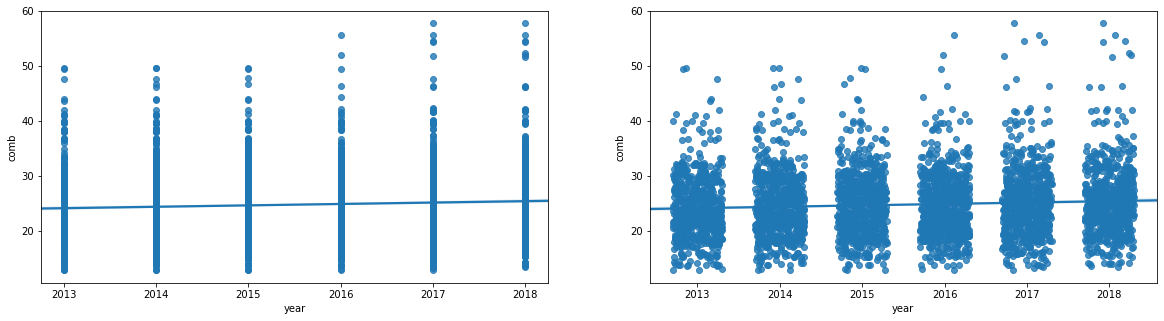

In [111]:
fuel_econ = pd.read_csv(r'C:\Users\trtu2001\Downloads\Udacity - Python Practice\fuel_econ.csv')
fuel_econ.head()

plt.figure(figsize= [20,5])

# plot on left - simple scatter
plt.subplot(1,2,1)
sb.regplot(data=fuel_econ, x='year', y='comb', truncate=False);

plt.subplot(1,2,2)
sb.regplot(data=fuel_econ, x='year', y='comb', truncate=False, x_jitter=0.3);

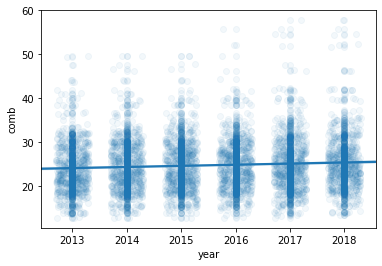

In [112]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

#### Heat Maps


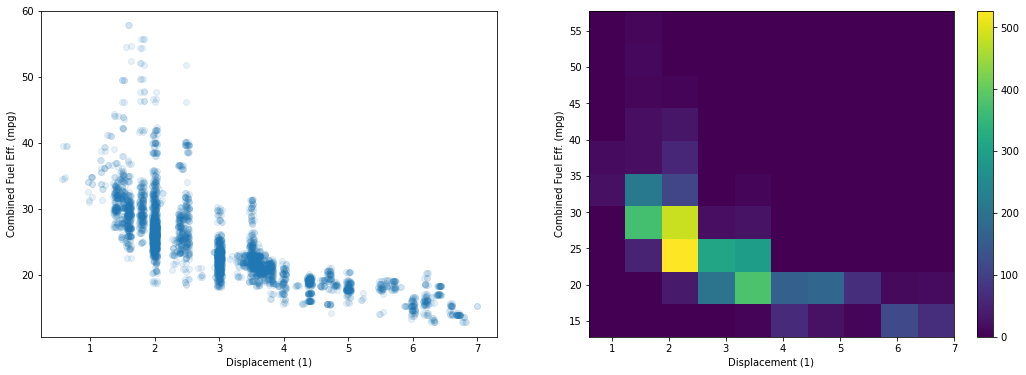

In [113]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

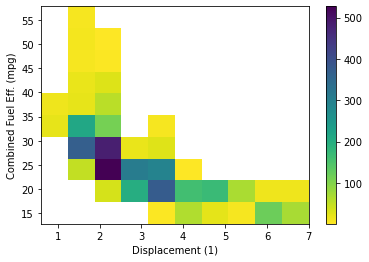

In [148]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

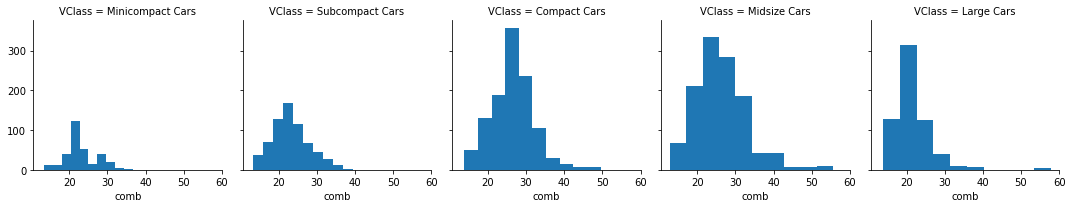

In [130]:
# Preparatory Step
fuel_econ = pd.read_csv('fuel_econ.csv')

# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, "comb")

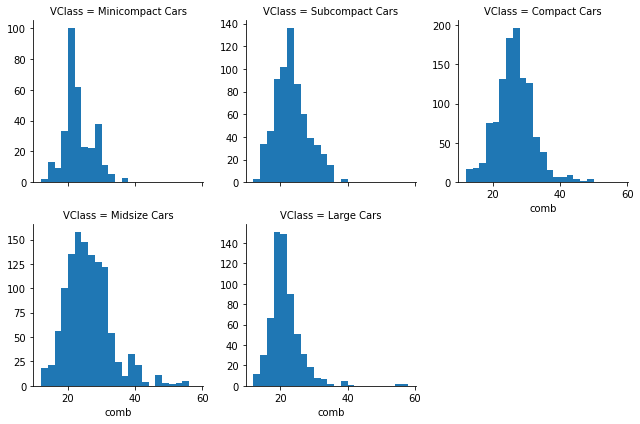

In [131]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

## Multivariate Exploration of Data


Non-postitional Encodings for Third Variables
There are four major cases to consider when we want to plot three variables together
1. Three numeric variables
2. Two numeric variables and one categorical variable
3. One numeric variable and two categorical variables
4. Three categorical variables


Text(0, 0.5, 'Special Defense')

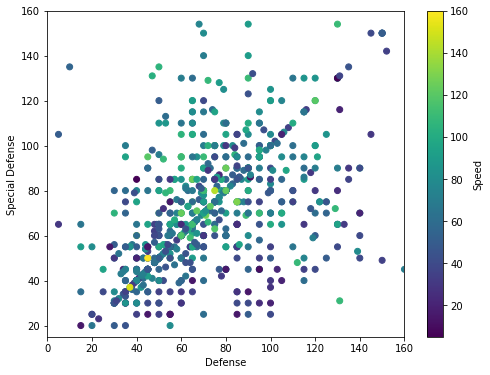

In [150]:
# plotting
plt.figure(figsize = [8,6])
plt.scatter(data = pokemon, x = 'defense', y = 'special-defense',
            c = 'speed')
plt.colorbar(label = 'Speed')
plt.xlim(0,160)
plt.ylim(15,160)
plt.xlabel('Defense')
plt.ylabel('Special Defense')

c:\Users\trtu2001\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


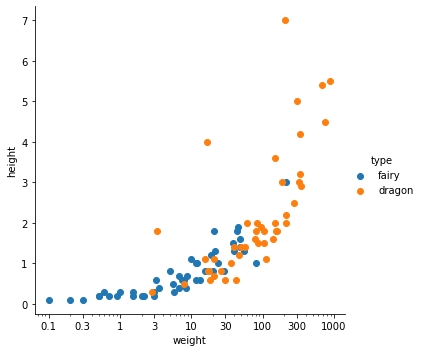

In [152]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, var_name = 'type_level', value_name = 'type').dropna()
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]
# plotting
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend()

c:\Users\trtu2001\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


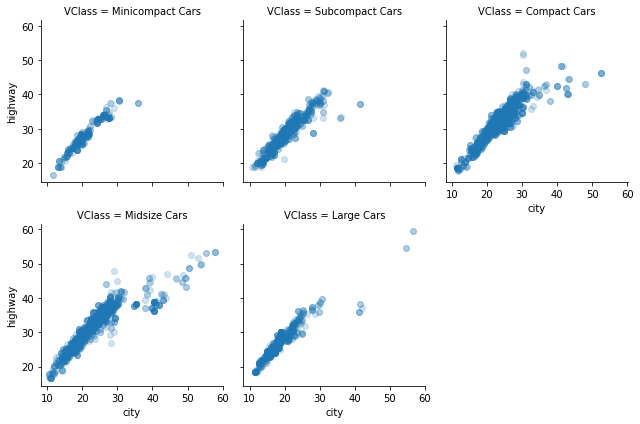

In [159]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', size = 3, col_wrap = 3)
g.map(plt.scatter, 'city', 'highway', alpha = 1/5)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Minicompact Cars'),
  Text(1, 0, 'Subcompact Cars'),
  Text(2, 0, 'Compact Cars'),
  Text(3, 0, 'Midsize Cars'),
  Text(4, 0, 'Large Cars')])

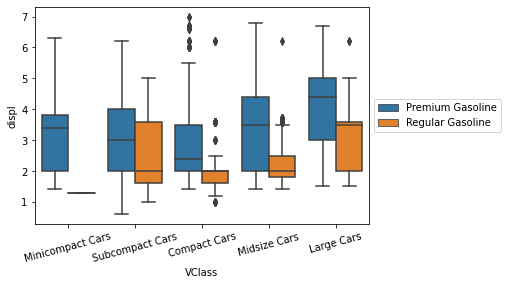

In [167]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
# plotting
sb.boxplot(data = fuel_econ_sub, x = 'VClass', y = 'displ', hue = 'fuelType')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)